# Введение в машинное обучение

Оператор мобильной связи «Мегалайн» выяснил: многие клиенты пользуются архивными тарифами. Они хотят построить систему, способную проанализировать поведение клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра».

Учитывая поставленные задачи, ход проекта можно разделить на несколько основных этапов:
* Общее изучение данных
* Обучение нескольких моделей и выбор наилучших гиперпараметров
* Валидация результатов
* Общие выводы

## Обзор данных

In [1]:
# импорт всего необходимого
from scipy import stats as st
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest,chi2,RFE

In [2]:
try:
    df = pd.read_csv('/datasets/users_behavior.csv')
except:
    df = pd.read_csv('users_behavior.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


С виду всё прилично, знаем, что предподготовка уже проведена

## Подготовка выборки

Для начала разделим выборку на обучающую, тестовую и валидационную. Делить будем, согласно рекомендациям, в соотношении 3:1:1

In [3]:
df_train, df_valid0 = train_test_split(df, test_size=0.40, random_state=12345) # отделяем 40% проверочных данных
df_valid, df_test = train_test_split(df_valid0, test_size=0.50, random_state=12345) # делим их на тестовые и валидационные

Далее нужно подготовить датасеты с наборами признаков

In [4]:
features_train = df_train.drop('is_ultra', axis=1)
target_train = df_train['is_ultra']
features_valid = df_valid.drop('is_ultra', axis=1)
target_valid = df_valid['is_ultra']
features_test = df_test.drop('is_ultra', axis=1)
target_test = df_test['is_ultra']

## Выбор модели

### Дерево решений

Проверим данную модель. Будем изменять гиперпараметры в цикле. Посмотрим что лучше

In [5]:
best_model1 = None
best_result1 = 0
for depth in range(1, 20):
    model = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    result = model.score(features_valid, target_valid)
    print('Accuracy:', result, 'Depth:', depth)
    if result > best_result1:
        best_model1 = model 
        best_result1 = result
        max_depth = depth
print("Accuracy наилучшей модели на валидационной выборке:", best_result1, "depth:", max_depth)

Accuracy: 0.7542768273716952 Depth: 1
Accuracy: 0.7822706065318819 Depth: 2
Accuracy: 0.7853810264385692 Depth: 3
Accuracy: 0.7791601866251944 Depth: 4
Accuracy: 0.7791601866251944 Depth: 5
Accuracy: 0.7838258164852255 Depth: 6
Accuracy: 0.7822706065318819 Depth: 7
Accuracy: 0.7791601866251944 Depth: 8
Accuracy: 0.7822706065318819 Depth: 9
Accuracy: 0.7744945567651633 Depth: 10
Accuracy: 0.7620528771384136 Depth: 11
Accuracy: 0.7620528771384136 Depth: 12
Accuracy: 0.7558320373250389 Depth: 13
Accuracy: 0.7589424572317263 Depth: 14
Accuracy: 0.7465007776049767 Depth: 15
Accuracy: 0.7340590979782271 Depth: 16
Accuracy: 0.7356143079315708 Depth: 17
Accuracy: 0.7309486780715396 Depth: 18
Accuracy: 0.7278382581648523 Depth: 19
Accuracy наилучшей модели на валидационной выборке: 0.7853810264385692 depth: 3


При использовании решающего дерева, лучшей моделью признаются модель с глубиной 3

### Случайный лес

Далее посмотрим как работает этот набор данных с моделью случайного леса. Будем искать лучшую модель при изменении гиперпараметра n_estimators

In [6]:
best_model2 = None
best_result2 = 0
#for est in range(1, 501, 10):
for est in range(1, 25):
    model = RandomForestClassifier(random_state=12345, n_estimators=est) 
    model.fit(features_train, target_train) 
    result = model.score(features_valid, target_valid)
    print('Accuracy:', result, 'n_estimators:', est)
    if result > best_result2:
        best_model2 = model 
        best_result2 = result
        n_estimators = est
print("Accuracy наилучшей модели на валидационной выборке:", best_result2, "est:", n_estimators)

Accuracy: 0.7107309486780715 n_estimators: 1
Accuracy: 0.7636080870917574 n_estimators: 2
Accuracy: 0.7387247278382582 n_estimators: 3
Accuracy: 0.7713841368584758 n_estimators: 4
Accuracy: 0.749611197511664 n_estimators: 5
Accuracy: 0.7807153965785381 n_estimators: 6
Accuracy: 0.7682737169517885 n_estimators: 7
Accuracy: 0.7822706065318819 n_estimators: 8
Accuracy: 0.7729393468118196 n_estimators: 9
Accuracy: 0.7853810264385692 n_estimators: 10
Accuracy: 0.7838258164852255 n_estimators: 11
Accuracy: 0.7869362363919129 n_estimators: 12
Accuracy: 0.7822706065318819 n_estimators: 13
Accuracy: 0.7838258164852255 n_estimators: 14
Accuracy: 0.7838258164852255 n_estimators: 15
Accuracy: 0.7869362363919129 n_estimators: 16
Accuracy: 0.7869362363919129 n_estimators: 17
Accuracy: 0.7931570762052877 n_estimators: 18
Accuracy: 0.7884914463452566 n_estimators: 19
Accuracy: 0.7869362363919129 n_estimators: 20
Accuracy: 0.7931570762052877 n_estimators: 21
Accuracy: 0.7884914463452566 n_estimators: 2

Наибольшая точность достигается при number of estimators равном 23. Точность незначительно выше, чем при использовании дерева решений, но код отрабатывает значительно дольше. (При значении 100 очень долго, при значении 500 не дождался...)

### Логистическая регрессия
Далее посмотрим как работает этот набор данных с моделью логистической регрессии. Будем искать лучшую модель при изменении гиперпараметра количества иттераций

In [7]:
best_model3 = None
best_result3 = 0
#for it in range(50, 2000):
for it in range(30, 100, 10):
    model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=it)
    model.fit(features_train, target_train) 
    result = model.score(features_valid, target_valid)
    print('Accuracy:', result, 'max_iter:', it)
    if result > best_result3:
        best_model3 = model 
        best_result3 = result
        max_iter = it
print("Accuracy наилучшей модели на валидационной выборке:", best_result3, "iter:", max_iter)

Accuracy: 0.7091757387247278 max_iter: 30
Accuracy: 0.7107309486780715 max_iter: 40
Accuracy: 0.7107309486780715 max_iter: 50
Accuracy: 0.7107309486780715 max_iter: 60
Accuracy: 0.7107309486780715 max_iter: 70
Accuracy: 0.7107309486780715 max_iter: 80
Accuracy: 0.7107309486780715 max_iter: 90
Accuracy наилучшей модели на валидационной выборке: 0.7107309486780715 iter: 40


C:\Users\cropp\anaconda3\envs\ds_practicum_env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\cropp\anaconda3\envs\ds_practicum_env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

В случае использования логистической регрессии, лучшие показатели достигаются уже на 40 иттерациях. Но оценка модели ниже всех. 

### Лучшая модель

Таким образом, мы обучили 3 модели на основе изученных в спринте алгоритмов и оценили точность предсказания на валидационной выборке. Получили следующие результаты:
1. Модель случайного леса - лучшая из лучших
2. Модель решающего дерева - чуть хуже
3. Модель логистической регрессии - хуже всех

## Проверка модели на тестовой выборке
Вот и настало время проверить лучшую модель в бою. 
Проверим модель случайного леса с количеством оценщиков 23

In [8]:
result_test_rand = best_model2.score(features_test, target_test)
print("Accuracy модели случайного леса на тестовой выборке:", result_test_rand)

Accuracy модели случайного леса на тестовой выборке: 0.7807153965785381


Точность на тестовом наборе данных оказалась немного ниже чем на валидационной выборке, но, всё-таки, довольно приличная угадайка получилась.

## Проверка модели на вменяемость*

### Дисбаланс
Это нужно было сделать в самом начале, но как-то картинка не складывалась. Возможно что-то не так с распределением пользователей по тарифу

0    2229
1     985
Name: is_ultra, dtype: int64

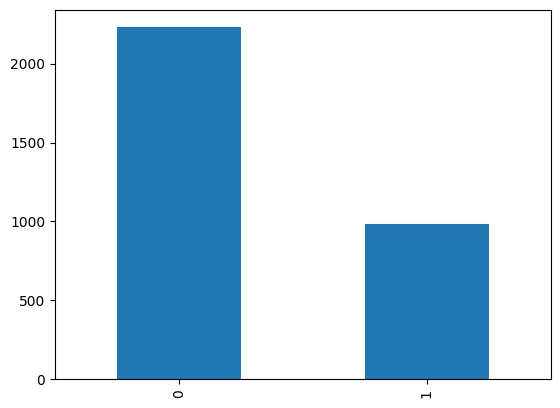

In [9]:
features = df.drop('is_ultra', axis=1)
target = df['is_ultra'] 
target.value_counts().plot(kind="bar")
display(target.value_counts())

Дисбаланс присутствует, но хорошо это или плохо - неясно

### Значимость факторов

Из увиденного/прочитанного также приходит на ум - посмотреть коэффициенты значимости каждого признака в каждой модели

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

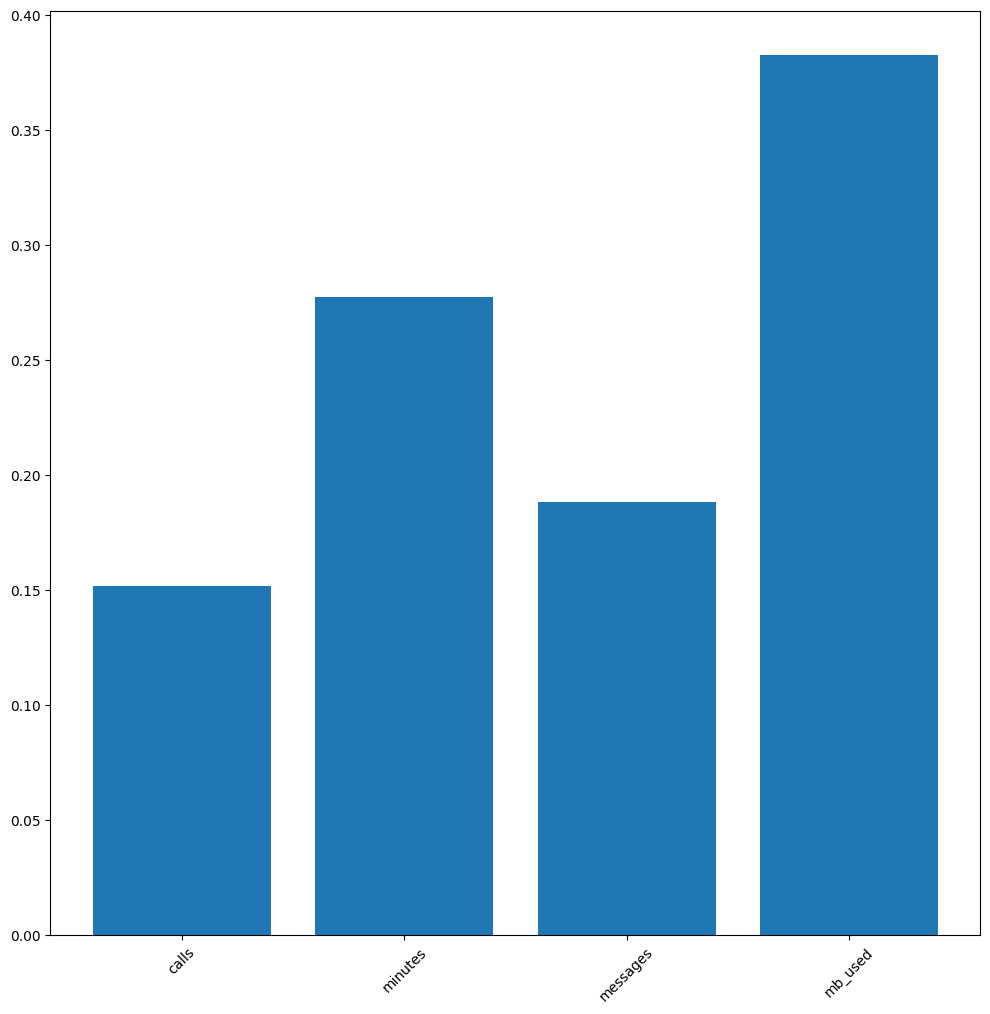

In [10]:
best_model0 = DecisionTreeClassifier()
best_model0.fit(features_train, target_train)
# смотреть будем методом feature_importances_
plt.figure(figsize=(12,12))
plt.bar(features_train.columns, best_model0.feature_importances_)
plt.xticks(rotation=45)

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

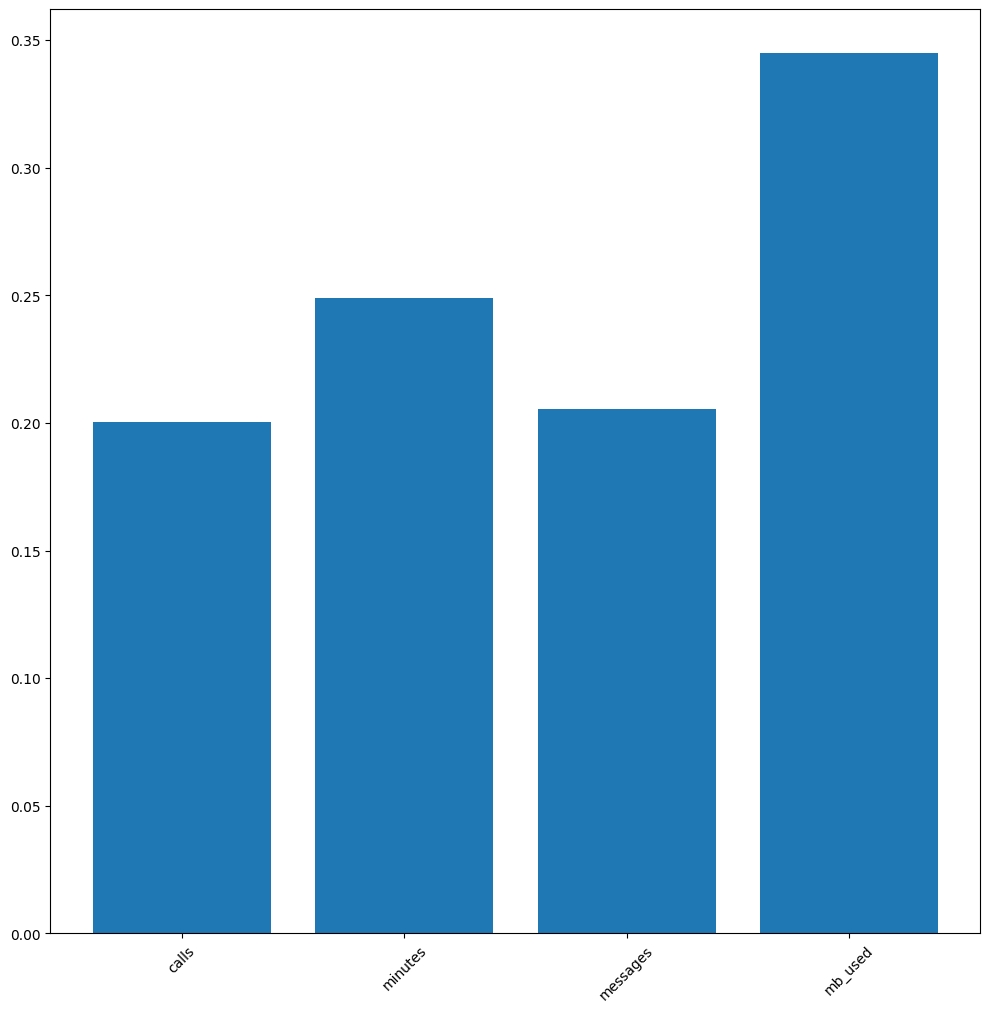

In [11]:
best_model00 = RandomForestClassifier()
best_model00.fit(features_train, target_train)
# смотреть будем методом feature_importances_
plt.figure(figsize=(12,12))
plt.bar(features_train.columns, best_model00.feature_importances_)
plt.xticks(rotation=45)

Если я правильно всё понял, то качество предсказаний модели решающего дерева можно улучшить, если убрать наимение незначимые признаки. В нашем случае - это количество звонков. Попробуем смоделировать эту ситуацию и сравним оценки двух моделей.

In [12]:
features_train1 = df_train.drop(['calls','is_ultra'], axis=1)
target_train1 = df_train['is_ultra']
features_valid1 = df_valid.drop(['calls','is_ultra'], axis=1)
target_valid1 = df_valid['is_ultra']

# обучим модель на обрезанной версии данных
best_model_tree = None
best_result_tree = 0
for depth in range(1, 20):
    model = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    model.fit(features_train1, target_train1)
    result = model.score(features_valid1, target_valid1)
    if result > best_result_tree:
        best_model_tree = model 
        best_result_tree = result
        max_depth = depth
print("Accuracy наилучшей модели на валидационной выборке:", best_result_tree, "depth:", max_depth)

Accuracy наилучшей модели на валидационной выборке: 0.7884914463452566 depth: 4


In [13]:
best_model_rand = None
best_result_rand = 0
for est in range(1, 25):
    model = RandomForestClassifier(random_state=12345, n_estimators=est) 
    model.fit(features_train1, target_train1) 
    result = model.score(features_valid1, target_valid1)
    if result > best_result_rand:
        best_model_rand = model 
        best_result_rand = result
        n_estimators = est
print("Accuracy наилучшей модели на валидационной выборке:", best_result_rand, "est:", n_estimators)

Accuracy наилучшей модели на валидационной выборке: 0.7822706065318819 est: 18


После удаления признака calls результаты 2-ух моделей практически сравнялись. По идее, можно использовать любую

## Общие выводы

Итого, из 3 изученных в спринте алгоритмов, лучшим оказался случайный лес. Он обеспечил точность предсказания выше 75% на валидационном и тестовом наборе данных
Также мы провели исследование значимости факторов и выявили наименее значимый - calls. После отбрасывания calls, разница между двумя лучшими моделями (случайный лес и решающее дерево) снизилась до уровня погрешности и можно говорить, что обе из этих моделей вполне пригодны для решения нашей задачи.

Кроме того, выявлен значительный дисбалан по соотношению пользователей ultra и smart. Данное обстоятельство может также влиять на качество предсказания моделей